In [1]:
#import dependencies/libraries
import json
import praw
import pprint
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [2]:
#set the base url and call api credentials
url = 'https://www.reddit.com/'
with open("json_cred.json") as f:
    params = json.load(f)

In [3]:
#set variable using api cred
reddit = praw.Reddit(client_id=params['client_id'], 
                     client_secret=params['api_key'],
                     password=params['password'], 
                     user_agent='<name it something descriptive> accessAPI:v0.0.1 (by /u/<yourusername>)',
                     username=params['username'])

In [4]:
#pulls single subreddit and its info
subreddit = reddit.subreddit('Politics')
print(subreddit.display_name)  # Output: iama
print(subreddit.title)         # Output:I Am A, where the mundane...
#print(subreddit.description)
print(subreddit.subscribers)

Politics
Politics
5277911


In [5]:
#iterates through subreddit for ""
ids_list = []
for submission in subreddit.controversial(limit=10):
    #print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    #print(submission.url)    # Output: the URL the submission points to, # or the submission's URL if it's a self post
    #print(submission.author) 
    
    ids_list.append(submission.id)
    
print(ids_list)


1659
5blmi4
0
4zd07t
0
6mvdp
54
57buyp
75
o1yjd
0
635y4
0
awoxz
22
ihjvi
459
o1yjq
57
o1yla
['5blmi4', '4zd07t', '6mvdp', '57buyp', 'o1yjd', '635y4', 'awoxz', 'ihjvi', 'o1yjq', 'o1yla']


In [6]:
#for each id in id list
for id_dict in ids_list:
    sub = reddit.submission(id = id_dict)
    print(sub.upvote_ratio)

0.5
0.48
0.49
0.5
0.55
0.5
0.5
0.51
0.69
0.53


In [7]:
# assume you have a Reddit instance bound to variable `reddit`
submission = reddit.submission(id='5blmi4')
print(submission.title) # to make it non-lazy
pprint.pprint(vars(submission))

I Was With Bernie Till the End; Now We All Must Vote Hillary
{'_comments': <praw.models.comment_forest.CommentForest object at 0x000001C0A24137B8>,
 '_comments_by_id': {'t1_d9peucb': Comment(id='d9peucb'),
                     't1_d9pf9as': Comment(id='d9pf9as'),
                     't1_d9pf9pc': Comment(id='d9pf9pc'),
                     't1_d9pfaa3': Comment(id='d9pfaa3'),
                     't1_d9pfbq2': Comment(id='d9pfbq2'),
                     't1_d9pfgd9': Comment(id='d9pfgd9'),
                     't1_d9pfyeg': Comment(id='d9pfyeg'),
                     't1_d9pg5sv': Comment(id='d9pg5sv'),
                     't1_d9pgnwm': Comment(id='d9pgnwm'),
                     't1_d9pgpox': Comment(id='d9pgpox'),
                     't1_d9pgpqs': Comment(id='d9pgpqs'),
                     't1_d9pgrwm': Comment(id='d9pgrwm'),
                     't1_d9pgtpv': Comment(id='d9pgtpv'),
                     't1_d9ph6zm': Comment(id='d9ph6zm'),
                     't1_d9ph7yc': Comme

In [8]:
conservative1 = reddit.subreddit('conservative')
conservative1_dict = {"Author": []}
for submission in conservative1.controversial('year', limit = 100000):
   conservative1_dict["Author"].append(submission.author)
conservative1_df = pd.DataFrame(conservative1_dict)
conservative1_df.head(10)

,Author
0,chabanais
1,optionhome
2,freq-ee
3,LinkedPioneer
4,Brave_Samuel
5,Clatsop
6,chabanais
7,optionhome
8,Zac1245
9,thatrightwinger


In [9]:
conservative2 = reddit.subreddit('conservative')
conservative2_dict = {"Author": []}
for submission in conservative2.top('year', limit = 100000):
   conservative2_dict["Author"].append(submission.author)
conservative2_df = pd.DataFrame(conservative2_dict)
conservative2_df.head(10)

,Author
0,PurpleAngel23
1,chabanais
2,chabanais
3,elvisjulep
4,chabanais
5,chabanais
6,Yosoff
7,chabanais
8,swiet
9,krayhayft


In [54]:
republican1 = reddit.subreddit('republican')
republican1_dict = {"Authors": []}
for submission in republican1.controversial('year', limit = 100000):
   republican1_dict["Authors"].append(submission.author)
republican1_df = pd.DataFrame(republican1_dict)
republican1_df.describe()

,Authors
count,986
unique,333
top,shibeKBVE
freq,80


In [11]:
republican2 = reddit.subreddit('republican')
republican2_dict = {"Author": []}
for submission in republican2.top('year', limit = 100000):
   republican2_dict["Author"].append(submission.author)
republican2_df = pd.DataFrame(republican2_dict)
republican2_df.head(10)

,Author
0,ntrout24
1,apxcvii
2,EagleVol63
3,detesss
4,dudenamedgunther
5,hibobshin
6,VaccineTruth11
7,SOCIALIST_DESTROYER
8,think_you_know
9,Dward_Man


In [12]:
controversial_right_df = pd.merge(left=conservative1_df, right=republican1_df, how='outer', left_index=True,
 right_index=True)
controversial_right_df.head()

,Author_x,Author_y
0,chabanais,None
1,optionhome,jayaday
2,freq-ee,emeriticus
3,LinkedPioneer,mdruckus
4,Brave_Samuel,shibeKBVE


In [13]:
top_right_df = pd.merge(left=conservative2_df, right=republican2_df, how='outer', left_index=True,
 right_index=True)
top_right_df.head(20)

,Author_x,Author_y
0,PurpleAngel23,ntrout24
1,chabanais,apxcvii
2,chabanais,EagleVol63
3,elvisjulep,detesss
4,chabanais,dudenamedgunther
5,chabanais,hibobshin
6,Yosoff,VaccineTruth11
7,chabanais,SOCIALIST_DESTROYER
8,swiet,think_you_know
9,krayhayft,Dward_Man


In [14]:
fuckthealtright1 = reddit.subreddit('fuckthealtright')
fuckthealtright1_dict = {"Author": []}
for submission in fuckthealtright1.controversial('year', limit = 1000):
   fuckthealtright1_dict["Author"].append(submission.author)
fuckthealtright1_df = pd.DataFrame(fuckthealtright1_dict)
fuckthealtright1_df.head(10)

,Author
0,Cory2020
1,bookemhorns
2,BeardoPrime
3,silkydangler
4,kpmadness
5,neroisstillbanned
6,Loveinthemud
7,BadgerKomodo
8,Uhillbilly
9,RecoveringH2OAddict


In [15]:
fuckthealtright2 = reddit.subreddit('fuckthealtright')
fuckthealtright2_dict = {"Author": []}
for submission in fuckthealtright2.top('year', limit = 1000):
   fuckthealtright2_dict["Author"].append(submission.author)
fuckthealtright2_df = pd.DataFrame(fuckthealtright2_dict)
fuckthealtright2_df.head(10)

,Author
0,Glitchakos
1,corylulu
2,RecoveringH2OAddict
3,None
4,im_not_pooping
5,JoseTwitterFan
6,nobody_from_nowhere1
7,reedemerofsouls
8,0WatcherintheWater0
9,relevantlife


In [16]:
democrats1 = reddit.subreddit('democrats')
democrats1_dict = {"Author": []}
for submission in democrats1.controversial('year', limit = 1000):
   democrats1_dict["Author"].append(submission.author)
democrats1_df = pd.DataFrame(democrats1_dict)
democrats1_df.head(10)

,Author
0,therecordcorrected
1,Ghdust2
2,clkou
3,wenchette
4,dolphins3
5,BlankVerse
6,davidasc22
7,tolazyforname
8,fluffykerfuffle1
9,Mynameis__--__


In [17]:
democrats2 = reddit.subreddit('democrats')
democrats2_dict = {"Author": []}
for submission in democrats2.top('year', limit = 1000):
   democrats2_dict["Author"].append(submission.author)
democrats2_df = pd.DataFrame(democrats2_dict)
democrats2_df.head(10)

,Author
0,VegaThePunisher
1,Tribat_1
2,None
3,therecordcorrected
4,StatisticalAstronaut
5,jaydawg69
6,jaydawg69
7,CosmicPerspectiveATX
8,ISayISayISitonU
9,VegaThePunisher


In [18]:
topmindsofreddit1 = reddit.subreddit('topmindsofreddit')
topmindsofreddit1_dict = {"Author": []}
for submission in topmindsofreddit1.controversial('year', limit = 1000):
   topmindsofreddit1_dict["Author"].append(submission.author)
topmindsofreddit1_df = pd.DataFrame(topmindsofreddit1_dict)
topmindsofreddit1_df.head(10)

,Author
0,H501
1,bigblackhotdog
2,crackerbarrelpants
3,sarinonline
4,TenaciousFeces
5,bill-bart
6,napoleoncalifornia
7,Toraden
8,fortheliving
9,Awild1313


In [19]:
topmindsofreddit2 = reddit.subreddit('topmindsofreddit')
topmindsofreddit2_dict = {"Author": []}
for submission in topmindsofreddit2.top('year', limit = 1000):
   topmindsofreddit2_dict["Author"].append(submission.author)
topmindsofreddit2_df = pd.DataFrame(topmindsofreddit2_dict)
topmindsofreddit2_df.head(10)

,Author
0,mootree7
1,DC_Swamp_Thing
2,draco_venator
3,BareknuckleCagefight
4,Avelina9X
5,Litsandwitch
6,beanzamillion21
7,NeverwuzBoi
8,Parsleymagnet
9,The_Stza


In [20]:
latestagecapitalism1 = reddit.subreddit('latestagecapitalism')
latestagecapitalism1_dict = {"Author": []}
for submission in latestagecapitalism1.controversial('year', limit = 1000):
   latestagecapitalism1_dict["Author"].append(submission.author)
latestagecapitalism1_df = pd.DataFrame(latestagecapitalism1_dict)
latestagecapitalism1_df.head(10)

,Author
0,CaptMackenzieCalhoun
1,CaptMackenzieCalhoun
2,CaptMackenzieCalhoun
3,Gigadweeb
4,CaptMackenzieCalhoun
5,pdirksnola
6,CaptMackenzieCalhoun
7,Mercy_is_Racist
8,DrRakdos
9,God_of_Narcissism


In [21]:
latestagecapitalism2 = reddit.subreddit('latestagecapitalism')
latestagecapitalism2_dict = {"Author": []}
for submission in latestagecapitalism2.top('year', limit = 1000):
   latestagecapitalism2_dict["Author"].append(submission.author)
latestagecapitalism2_df = pd.DataFrame(latestagecapitalism2_dict)
latestagecapitalism2_df.head(10)

,Author
0,RelevantSwimmer
1,Redditer_F23
2,shy_monster_1312
3,SavageHuxley
4,K1nsey6
5,twentysixdoubleO
6,samael_demiurge
7,Canabinoid
8,Shweeden
9,None


In [22]:
progressive1 = reddit.subreddit('progressive')
progressive1_dict = {"Author": []}
for submission in progressive1.controversial('year', limit = 1000):
   progressive1_dict["Author"].append(submission.author)
progressive1_df = pd.DataFrame(progressive1_dict)
progressive1_df.describe()

,Author
count,969
unique,228
top,DoremusJessup
freq,72


In [61]:
progressive2 = reddit.subreddit('progressive')
progressive2_dict = {"Author": []}
for submission in progressive2.top('year', limit = 1000):
   progressive2_dict["Author"].append(submission.author)
progressive2_df = pd.DataFrame(progressive2_dict)
progressive2_df.head(10)

,Author
0,thedabarry
1,easyone
2,chicofaraby
3,progress18
4,madam1
5,JimHeathTV
6,progress18
7,CurriVida
8,thedabarry
9,DoremusJessup


In [24]:
controversial_right_df = pd.merge(left=conservative1_df, right=republican1_df, how='outer', left_index=True,
 right_index=True)
controversial_right_df = controversial_right_df.rename(columns={'Author_x': 'Conservative', 'Author_y': 'Republican'})
controversial_right_df.head()

,Conservative,Republican
0,chabanais,None
1,optionhome,jayaday
2,freq-ee,emeriticus
3,LinkedPioneer,mdruckus
4,Brave_Samuel,shibeKBVE


In [46]:
convers_liberal_df = pd.merge(left=fuckthealtright1_df, right=democrats1_df, how='outer', left_index=True,
 right_index=True)
convers_liberal_df = convers_liberal_df.rename(columns={'Author_x': 'FuckTheAltRight', 'Author_y': 'Democrats'})
convers_liberal_df.head()

,FuckTheAltRight,Democrats
0,Cory2020,therecordcorrected
1,bookemhorns,Ghdust2
2,BeardoPrime,clkou
3,silkydangler,wenchette
4,kpmadness,dolphins3


In [47]:
convers_liberal_df = pd.merge(left=convers_liberal_df, right=topmindsofreddit1_df, how='outer', left_index=True,
 right_index=True)
convers_liberal_df = convers_liberal_df.rename(columns={'Author': 'TopMindsofReddit'})
convers_liberal_df.head()

,FuckTheAltRight,Democrats,TopMindsofReddit
0,Cory2020,therecordcorrected,H501
1,bookemhorns,Ghdust2,bigblackhotdog
2,BeardoPrime,clkou,crackerbarrelpants
3,silkydangler,wenchette,sarinonline
4,kpmadness,dolphins3,TenaciousFeces


In [48]:
convers_liberal_df = pd.merge(left=convers_liberal_df, right=latestagecapitalism1_df, how='outer', left_index=True,
 right_index=True)
convers_liberal_df = convers_liberal_df.rename(columns={'Author': 'LateStageofCapitalism'})
convers_liberal_df.head()

,FuckTheAltRight,Democrats,TopMindsofReddit,LateStageofCapitalism
0,Cory2020,therecordcorrected,H501,CaptMackenzieCalhoun
1,bookemhorns,Ghdust2,bigblackhotdog,CaptMackenzieCalhoun
2,BeardoPrime,clkou,crackerbarrelpants,CaptMackenzieCalhoun
3,silkydangler,wenchette,sarinonline,Gigadweeb
4,kpmadness,dolphins3,TenaciousFeces,CaptMackenzieCalhoun


In [49]:
convers_liberal_df = pd.merge(left=convers_liberal_df, right=progressive1_df, how='outer', left_index=True,
 right_index=True)

In [51]:
convers_liberal_df = convers_liberal_df.rename(columns={'Author': 'Progressive'})
convers_liberal_df.head()

,FuckTheAltRight,Democrats,TopMindsofReddit,LateStageofCapitalism,Progressive
0,Cory2020,therecordcorrected,H501,CaptMackenzieCalhoun,dannylenwinn
1,bookemhorns,Ghdust2,bigblackhotdog,CaptMackenzieCalhoun,system_exposure
2,BeardoPrime,clkou,crackerbarrelpants,CaptMackenzieCalhoun,therecordcorrected
3,silkydangler,wenchette,sarinonline,Gigadweeb,Lamont-Cranston
4,kpmadness,dolphins3,TenaciousFeces,CaptMackenzieCalhoun,IceHistory0


In [34]:
top_liberal_df = pd.merge(left=fuckthealtright2_df, right=democrats2_df, how='outer', left_index=True,
 right_index=True)
top_liberal_df = top_liberal_df.rename(columns={'Author_x': 'FuckTheAltRight', 'Author_y': 'Democrats'})
top_liberal_df.head()

,FuckTheAltRight,Democrats
0,Glitchakos,VegaThePunisher
1,corylulu,Tribat_1
2,RecoveringH2OAddict,None
3,None,therecordcorrected
4,im_not_pooping,StatisticalAstronaut


In [35]:
top_liberal_df = pd.merge(left=top_liberal_df, right=topmindsofreddit2_df, how='outer', left_index=True,
 right_index=True)
top_liberal_df = top_liberal_df.rename(columns={'Author': 'TopMindsofReddit'})

top_liberal_df = pd.merge(left=top_liberal_df, right=latestagecapitalism2_df, how='outer', left_index=True,
 right_index=True)
top_liberal_df = top_liberal_df.rename(columns={'Author': 'LateStageofCapitalism'})

top_liberal_df = pd.merge(left=top_liberal_df, right=progressive2_df, how='outer', left_index=True,
 right_index=True)
top_liberal_df = top_liberal_df.rename(columns={'Author': 'Progressive'})
top_liberal_df.describe()

,FuckTheAltRight,Democrats,TopMindsofReddit,LateStageofCapitalism,Progressive
count,982,991,973,965,987
unique,438,158,582,632,143
top,TheProgressiveReport,therecordcorrected,PorridgeCranium2,shy_monster_1312,DoremusJessup
freq,57,349,75,64,103


In [31]:
overlap_df = pd.DataFrame(progressive1_df[progressive1_df["Author"].isin(republican1_df["Author"])])
overlap_df.describe()

,Author
count,14
unique,7
top,dannylenwinn
freq,8


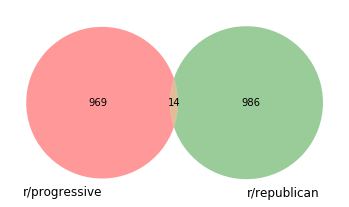

In [32]:
venn2(subsets = (969, 986, 14), set_labels = ("r/progressive", "r/republican"))
plt.show()

In [52]:
tot_author_lib = {"Authors": []}
for submission in progressive1.controversial('year', limit = 1000):
    tot_author_lib["Authors"].append(submission.author)
for submission in fuckthealtright1.controversial('year', limit = 1000):
   tot_author_lib["Authors"].append(submission.author)
for submission in latestagecapitalism1.controversial('year', limit = 1000):
   tot_author_lib["Authors"].append(submission.author)
for submission in topmindsofreddit1.controversial('year', limit = 1000):
   tot_author_lib["Authors"].append(submission.author)
for submission in democrats1.controversial('year', limit = 1000):
   tot_author_lib["Authors"].append(submission.author)

In [59]:
#print(tot_author_lib)
tot_author_lib_df = pd.DataFrame(tot_author_lib)
tot_author_lib_df.head()

,Authors
0,dannylenwinn
1,system_exposure
2,therecordcorrected
3,Lamont-Cranston
4,IceHistory0


In [60]:
overlap2_df = pd.DataFrame(tot_author_lib_df[tot_author_lib_df["Authors"].isin(republican1_df["Authors"])])
overlap2_df.describe()

,Authors
count,18
unique,9
top,dannylenwinn
freq,8


In [67]:
#make combined list of top liberal
tot_top_lib = {"Authors": []}
for submission in progressive2.top('year', limit = 1000):
    tot_top_lib["Authors"].append(submission.author)
for submission in fuckthealtright2.top('year', limit = 1000):
   tot_top_lib["Authors"].append(submission.author)
for submission in latestagecapitalism2.top('year', limit = 1000):
   tot_top_lib["Authors"].append(submission.author)
for submission in topmindsofreddit2.top('year', limit = 1000):
   tot_top_lib["Authors"].append(submission.author)
for submission in democrats2.top('year', limit = 1000):
   tot_top_lib["Authors"].append(submission.author)



In [68]:
newpatriotism = reddit.subreddit("newpatriotism")
conservatives = reddit.subreddit("conservatives")
thenewright = reddit.subreddit("thenewright")

#make combined list of top and controversial right
tot_con_right = {"Authors": []}
for submission in republican1.controversial('year', limit = 1000):
   tot_con_right["Authors"].append(submission.author)
for submission in conservative1.controversial('year', limit = 1000):
   tot_con_right["Authors"].append(submission.author)
for submission in conservatives.controversial('year', limit = 1000):
   tot_con_right["Authors"].append(submission.author)
for submission in thenewright.controversial('year', limit = 1000):
   tot_con_right["Authors"].append(submission.author)
for submission in newpatriotism.controversial('year', limit = 1000):
   tot_con_right["Authors"].append(submission.author)

In [69]:
tot_top_right = {"Authors": []}
for submission in republican2.top('year', limit = 1000):
   tot_top_right["Authors"].append(submission.author)
for submission in conservative2.top('year', limit = 1000):
   tot_top_right["Authors"].append(submission.author)
for submission in conservatives.top('year', limit = 1000):
   tot_top_right["Authors"].append(submission.author)
for submission in thenewright.top('year', limit = 1000):
   tot_top_right["Authors"].append(submission.author)
for submission in newpatriotism.top('year', limit = 1000):
   tot_top_right["Authors"].append(submission.author)

In [70]:
#Neutral subreddits
worldnews = reddit.subreddit("worldnews")
neutralpolitics = reddit.subreddit("neutralpolitics")
politicaldiscussion = reddit.subreddit("politicaldiscussion")
politics = reddit.subreddit("politics")

tot_con_neut = {"Authors": []}
for submission in worldnews.controversial('year', limit = 1000):
   tot_con_neut["Authors"].append(submission.author)
for submission in neutralpolitics.controversial('year', limit = 1000):
   tot_con_neut["Authors"].append(submission.author)
for submission in politicaldiscussion.controversial('year', limit = 1000):
   tot_con_neut["Authors"].append(submission.author)
for submission in politics.controversial('year', limit = 1000):
   tot_con_neut["Authors"].append(submission.author)

In [71]:
tot_top_neut = {"Authors": []}
for submission in worldnews.top('year', limit = 1000):
   tot_top_neut["Authors"].append(submission.author)
for submission in neutralpolitics.top('year', limit = 1000):
   tot_top_neut["Authors"].append(submission.author)
for submission in politicaldiscussion.top('year', limit = 1000):
   tot_top_neut["Authors"].append(submission.author)
for submission in politics.top('year', limit = 1000):
   tot_top_neut["Authors"].append(submission.author)

In [73]:
#List of of terms change to dataframes
#tot_author_lib_df
tot_top_lib_df = pd.DataFrame(tot_top_lib)
tot_con_right_df = pd.DataFrame(tot_con_right)
tot_top_right_df = pd.DataFrame(tot_top_right)
tot_con_neut_df = pd.DataFrame(tot_con_neut)
tot_top_neut_df = pd.DataFrame(tot_top_neut)

In [81]:
overlap3_df = pd.DataFrame(tot_top_neut_df[tot_top_neut_df["Authors"].isin(tot_top_lib_df["Authors"])])
overlap3_df.describe()

,Authors
count,216
unique,78
top,DoremusJessup
freq,23


In [97]:
#intersection test of top left and top neutral
itest = set(tot_top_lib_df["Authors"]).intersection(set(tot_top_neut_df["Authors"]))
itest = pd.DataFrame(itest)
#itest[0].value_counts()
itestwithoutnone = itest.mask(itest.eq('None')).dropna()
itestwithoutnone[0].describe()

count           78
unique          78
top       tt12345x
freq             1
Name: 0, dtype: object

In [99]:
#intersection of top left and top right
itest2 = set(tot_top_lib_df["Authors"]).intersection(set(tot_top_right_df["Authors"]))
itest2 = pd.DataFrame(itest2)
#itest[0].value_counts()
itestwithoutnone2 = itest2.mask(itest2.eq('None')).dropna()
itestwithoutnone2[0].describe()

count         23
unique        23
top       madam1
freq           1
Name: 0, dtype: object

In [101]:
#intersection of top right and top neutral
itest3 = set(tot_top_right_df["Authors"]).intersection(set(tot_top_neut_df["Authors"]))
itest3 = pd.DataFrame(itest3)
#itest[0].value_counts()
itestwithoutnone3 = itest3.mask(itest3.eq('None')).dropna()
itestwithoutnone3[0].describe()

count              12
unique             12
top       Perfect_Gas
freq                1
Name: 0, dtype: object

In [103]:
worldnews = reddit.subreddit("worldnews")
worldnews_dict = {"Author": []}
for submission in worldnews.top('year', limit = 1000):
   worldnews_dict["Author"].append(submission.author)
worldnews_df = pd.DataFrame(worldnews_dict)
worldnews_df.describe()


,Author
count,974
unique,497
top,maxwellhill
freq,98


In [104]:
neutralpolitics = reddit.subreddit("neutralpolitics")
neutralpolitics_dict = {"Author": []}
for submission in neutralpolitics.top('year', limit = 1000):
   neutralpolitics_dict["Author"].append(submission.author)
neutralpolitics_df = pd.DataFrame(neutralpolitics_dict)
neutralpolitics_df.describe()


,Author
count,406
unique,226
top,crazyguzz1
freq,67


In [105]:
politicaldiscussion = reddit.subreddit("politicaldiscussion")
politicaldiscussion_dict = {"Author": []}
for submission in politicaldiscussion.top('year', limit = 1000):
   politicaldiscussion_dict["Author"].append(submission.author)
politicaldiscussion_df = pd.DataFrame(politicaldiscussion_dict)
politicaldiscussion_df.describe()

,Author
count,875
unique,622
top,Anxa
freq,31


In [106]:
politics = reddit.subreddit("politics")
politics_dict = {"Author": []}
for submission in politics.top('year', limit = 1000):
   politics_dict["Author"].append(submission.author)
politics_df = pd.DataFrame(politics_dict)
politics_df.describe()

,Author
count,976
unique,519
top,PoliticsModeratorBot
freq,44


In [107]:
conservative2_df.describe()

,Author
count,937
unique,298
top,chabanais
freq,245


In [108]:
republican2_df.describe()

,Author
count,987
unique,298
top,Foubar
freq,181


In [109]:
newpatriotism = reddit.subreddit("newpatriotism")
newpatriotism_dict = {"Author": []}
for submission in newpatriotism.top('year', limit = 1000):
   newpatriotism_dict["Author"].append(submission.author)
newpatriotism_df = pd.DataFrame(newpatriotism_dict)
newpatriotism_df.describe()

,Author
count,807
unique,149
top,TheDVille
freq,298


In [110]:
conservatives = reddit.subreddit("conservatives")
conservatives_dict = {"Author": []}
for submission in conservatives.top('year', limit = 1000):
   conservatives_dict["Author"].append(submission.author)
conservatives_df = pd.DataFrame(conservatives_dict)
conservatives_df.describe()

,Author
count,992
unique,139
top,IBiteYou
freq,433


In [111]:
thenewright = reddit.subreddit("thenewright")
thenewright_dict = {"Author": []}
for submission in thenewright.top('year', limit = 1000):
   thenewright_dict["Author"].append(submission.author)
thenewright_df = pd.DataFrame(thenewright_dict)
thenewright_df.describe()

,Author
count,992
unique,141
top,some1thing1
freq,171


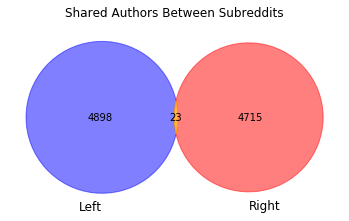

In [145]:
v = venn2(subsets = {'10' : 4898, '01' : 4715, '11' : 23}, set_labels = ("Left", "Right"))
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('Blue')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('Red')
v.get_patch_by_id('11').set_alpha(0.75)
v.get_patch_by_id('11').set_color('orange')
plt.title("Shared Authors Between Subreddits")
plt.savefig("Venn Diagram LvR.png")
plt.show()

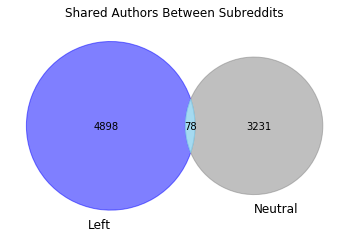

In [144]:
v = venn2(subsets = {'10' :4898, '01' :3231, '11': 78}, set_labels = ("Left", "Neutral"))
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('Blue')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('Gray')
v.get_patch_by_id('11').set_alpha(0.75)
v.get_patch_by_id('11').set_color('skyblue')
plt.title("Shared Authors Between Subreddits")
plt.savefig("Venn Diagram LvN.png")
plt.show()

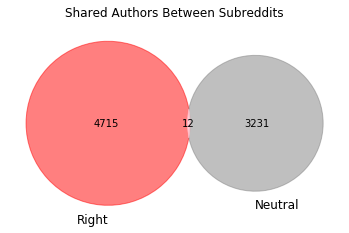

In [143]:
v = venn2(subsets = {'10':4715, '01': 3231, '11': 12}, set_labels = ("Right", "Neutral"))
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('10').set_color('Red')
v.get_patch_by_id('01').set_alpha(0.5)
v.get_patch_by_id('01').set_color('Gray')
v.get_patch_by_id('11').set_alpha(0.75)
v.get_patch_by_id('11').set_color('Pink')
plt.title("Shared Authors Between Subreddits")
plt.savefig("Venn Diagram RvN.png")
plt.show()